<a href="https://colab.research.google.com/github/ankitjamuar/Android-Navigation-Drawer-with-sliding-tab/blob/master/CIFAR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
classes = ["airplane","automobile"," bird ","cat ","deer ","dog ","frog ","horse ","ship ","truck"]

In [4]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(activation="relu", input_shape=[32,32,3], filters=32,kernel_size=3, padding="same"))
model.add(tf.keras.layers.Conv2D(activation="relu", filters=32,kernel_size=3, padding="same"))
model.add(tf.keras.layers.MaxPool2D(strides=2, pool_size=2, padding="valid"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(activation="relu", filters=32,kernel_size=3, padding="same"))
model.add(tf.keras.layers.MaxPool2D(strides=2, pool_size=2, padding="valid"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [129]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)         

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [132]:
model.fit(x_train, y_train, epochs=100)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 181us/sample - loss: 1.5980 - sparse_categorical_accuracy: 0.4131
Epoch 2/100
50000/50000 [==============================] - 9s 171us/sample - loss: 1.1097 - sparse_categorical_accuracy: 0.6018
Epoch 3/100
50000/50000 [==============================] - 9s 171us/sample - loss: 0.9109 - sparse_categorical_accuracy: 0.6763
Epoch 4/100
50000/50000 [==============================] - 9s 173us/sample - loss: 0.7909 - sparse_categorical_accuracy: 0.7208
Epoch 5/100
50000/50000 [==============================] - 9s 174us/sample - loss: 0.7027 - sparse_categorical_accuracy: 0.7526
Epoch 6/100
50000/50000 [==============================] - 8s 169us/sample - loss: 0.6353 - sparse_categorical_accuracy: 0.7782
Epoch 7/100
50000/50000 [==============================] - 8s 168us/sample - loss: 0.5883 - sparse_categorical_accuracy: 0.7920
Epoch 8/100
50000/50000 [==============================] - 9s 178us/sample - loss

0.99998426
ship 


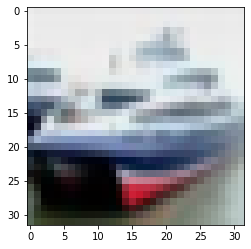

In [137]:
# Predict from test Set
prediction =  model.predict(x_test)[9] 
index =  np.argmax(  prediction  ) 
print( prediction[index] )
print( classes[y_test[index][0]] )
plt.imshow(x_test[index])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship 
0.99466777


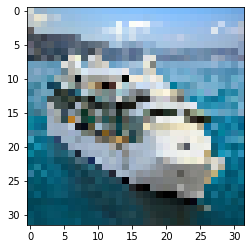

In [138]:
# Predict from url 
import cv2
import urllib.request
from PIL import Image
image = Image. open(urllib.request.urlopen("https://i.insider.com/5cbf50dfd1a2f8074406a8b2?width=1100&format=jpeg&auto=webp"))
numpy_image = np.array(image)
numpy_image = numpy_image/255
resized_image = cv2.resize(numpy_image, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
prediction = model.predict([[  resized_image   ]])[0]
index =  np.argmax( prediction )
print( classes[index] )
print( prediction[index] )
plt.imshow(resized_image)